In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('/content/drive/MyDrive/flood_final/nilwala_flood_random_floodoccurred.csv')

In [3]:
data.head()

,Date,Rainfall_mm,UpperCatchmentLevel_m,RiverLevel_m,SoilSaturationPercent,FloodOccurred
0,2024-10-01,100.496714,4.821005,7.016989,74.778361,0
1,2024-10-02,71.861736,6.749819,2.807835,84.448814,1
2,2024-10-03,173.647689,7.067294,4.789606,91.181801,0
3,2024-10-04,93.523030,6.380370,4.995638,72.996626,0
4,2024-10-05,204.765847,6.119098,4.393435,71.829815,0


In [4]:
data = data.set_index(data['Date'])
data = data.drop('Date', axis=1)
data.head()

,Rainfall_mm,UpperCatchmentLevel_m,RiverLevel_m,SoilSaturationPercent,FloodOccurred
Date,,,,,
2024-10-01,100.496714,4.821005,7.016989,74.778361,0
2024-10-02,71.861736,6.749819,2.807835,84.448814,1
2024-10-03,173.647689,7.067294,4.789606,91.181801,0
2024-10-04,93.523030,6.380370,4.995638,72.996626,0
2024-10-05,204.765847,6.119098,4.393435,71.829815,0


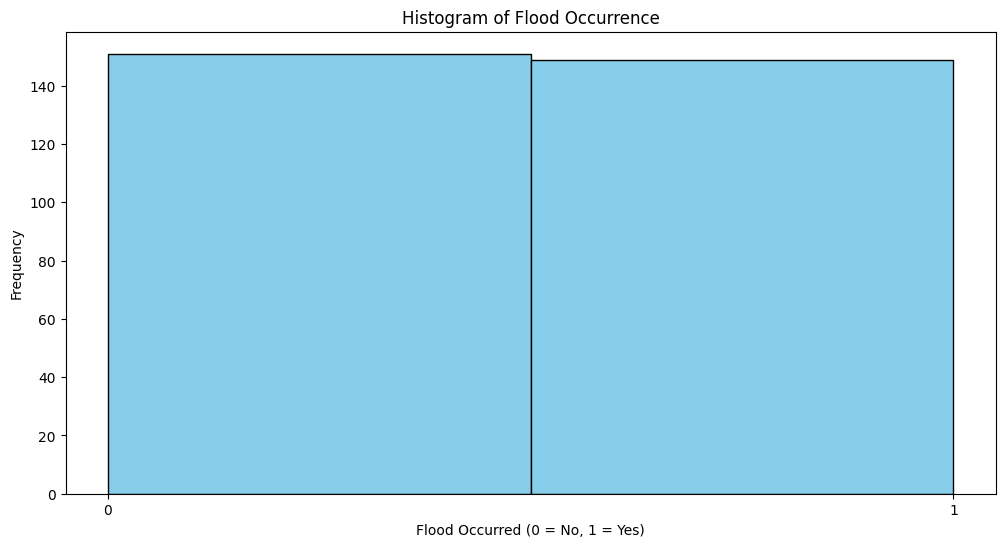

In [5]:
plt.figure(figsize=(12,6))
plt.hist(data['FloodOccurred'], bins=2, color='skyblue', edgecolor='black')

plt.xlabel('Flood Occurred (0 = No, 1 = Yes)')
plt.ylabel('Frequency')
plt.title('Histogram of Flood Occurrence')

plt.xticks([0, 1])  # Ensure x-axis ticks only show 0 and 1
plt.show()

In [6]:
x = data.drop('FloodOccurred', axis=1)
y = data['FloodOccurred']

In [7]:
x.shape

(300, 4)

In [8]:
y.shape

(300,)

In [9]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [10]:
x

array([[0.31277256, 0.22120038, 0.79733298, 0.55518112],
       [0.1803773 , 0.47067127, 0.09602018, 0.76007883],
       [0.65098974, 0.51173312, 0.42621517, 0.90273746],
       ...,
       [0.21017869, 0.27167251, 0.43573025, 0.3946949 ],
       [0.54541178, 0.31234581, 0.82891012, 0.45554757],
       [0.17468059, 0.36170076, 0.11022082, 0.70864487]])

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [12]:
x_train.shape

(240, 4)

In [13]:
y_test.shape

(60,)

In [14]:
model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100],   # fewer options
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

In [15]:
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=8,                # 8 fold cross-validation
                           n_jobs=-1,           # Use all processors
                           verbose=2,
                           scoring='accuracy')  # Metric to optimize


In [16]:
grid_search.fit(x_train, y_train)

Fitting 8 folds for each of 24 candidates, totalling 192 fits


GridSearchCV(cv=8, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy', verbose=2)

In [17]:
best_randomf = grid_search.best_estimator_
y_predict = best_randomf.predict(x_test)
y_predict

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1])

In [18]:
# Assume you have the original feature names in a list
feature_names = ['Rainfall_mm', 'UpperCatchmentLevel_m', 'RiverLevel_m', 'SoilSaturationPercent']

Feature_DataFrame = pd.DataFrame(x_test, columns=feature_names, index=y_test.index)
predicted_Actual = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict}, index=y_test.index)

predicted_DataFrame = pd.concat([Feature_DataFrame, predicted_Actual], axis=1)
predicted_DataFrame

,Rainfall_mm,UpperCatchmentLevel_m,RiverLevel_m,SoilSaturationPercent,Actual,Predicted
Date,,,,,,
2024-10-04,0.278360,0.416756,0.157650,0.541014,0,1
2024-12-06,0.091470,0.420495,0.435589,0.160927,1,1
2024-11-22,0.945382,0.235850,0.140389,0.288552,0,0
2024-10-10,0.821575,0.280283,0.630560,0.230987,1,1
2024-11-03,0.774442,0.552047,0.201716,0.087317,1,0
2024-10-27,0.005619,0.243376,0.559502,0.506145,0,1
2025-01-05,0.736380,0.313257,0.303059,0.517494,1,1
2024-10-10,0.818722,0.372971,0.663951,0.194334,0,1
2024-10-06,0.975185,0.449655,0.584032,0.084138,1,1


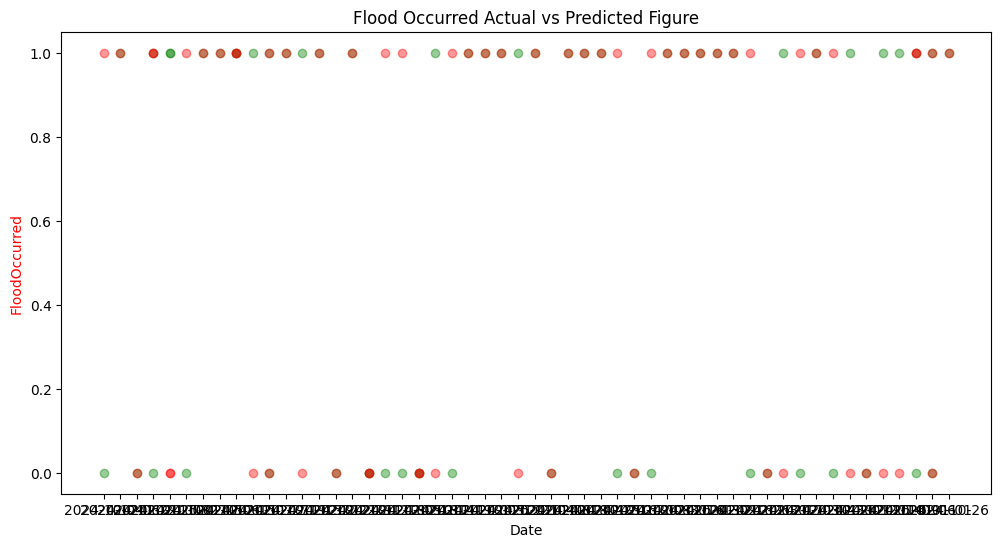

In [19]:
plt.figure(figsize=(12, 6))
plt.scatter(predicted_DataFrame.index, predicted_DataFrame['Actual'], color='green', alpha=0.4)
plt.scatter(predicted_DataFrame.index, predicted_DataFrame['Predicted'], color='red', alpha=0.4)
plt.xlabel('Date')
plt.ylabel('FloodOccurred', color='red')
plt.title('Flood Occurred Actual vs Predicted Figure')
plt.show()

In [20]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.55      0.50      0.52        24
           1       0.68      0.72      0.70        36

    accuracy                           0.63        60
   macro avg       0.61      0.61      0.61        60
weighted avg       0.63      0.63      0.63        60



In [21]:
import pickle

with open('/content/drive/MyDrive/flood_final/flood_predict_model.pkl', 'wb') as f:
    pickle.dump(best_randomf, f)

In [22]:
# flood_model download
from google.colab import files

files.download('/content/drive/MyDrive/flood_final/flood_predict_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
x_test

array([[0.27835988, 0.41675634, 0.15764982, 0.54101352],
       [0.09146956, 0.42049504, 0.43558891, 0.16092685],
       [0.94538174, 0.23585048, 0.14038873, 0.28855163],
       [0.82157502, 0.28028275, 0.63055955, 0.23098688],
       [0.77444181, 0.55204683, 0.20171606, 0.08731709],
       [0.00561888, 0.24337589, 0.55950242, 0.50614518],
       [0.73637956, 0.31325727, 0.30305904, 0.51749416],
       [0.81872226, 0.37297115, 0.66395142, 0.19433408],
       [0.97518462, 0.44965477, 0.58403225, 0.08413787],
       [0.68880804, 0.38028206, 0.3062798 , 0.61661193],
       [0.11252541, 0.56452295, 0.39656418, 0.74913274],
       [0.37839956, 0.5588187 , 0.24898047, 0.45810738],
       [0.50242097, 0.42663306, 0.33668869, 0.55372107],
       [0.05747604, 0.55115001, 0.60910475, 0.54862159],
       [0.02811165, 0.28102597, 0.29468708, 0.4559775 ],
       [0.31108968, 0.47500946, 0.54446953, 0.21536968],
       [0.75608123, 0.48672188, 0.53769761, 0.60946671],
       [0.31572632, 0.6388046 ,

In [24]:
import pandas as pd
import pickle
from sklearn.preprocessing import MinMaxScaler

# Get inputs from user and convert to float
Rainfall_mm = float(input('Insert Rainfall_mm: '))
UpperCatchmentLevel_m = float(input('Insert UpperCatchmentLevel_m: '))
RiverLevel_m = float(input('Insert RiverLevel_m: '))
SoilSaturationPercent = float(input('Insert SoilSaturationPercent: '))

model_path = '/content/drive/MyDrive/flood_final/flood_predict_model.pkl'

# Load the model
with open(model_path, 'rb') as f:
    model_pkl = pickle.load(f)

# Prepare the input DataFrame
input_dataFrame = pd.DataFrame({
    'Rainfall_mm': [Rainfall_mm],
    'UpperCatchmentLevel_m': [UpperCatchmentLevel_m],
    'RiverLevel_m': [RiverLevel_m],
    'SoilSaturationPercent': [SoilSaturationPercent]
})

print(input_dataFrame)

input_scaled = scaler.transform(input_dataFrame)

# Predict
predicted_data = model_pkl.predict(input_scaled)

print("Predicted Flood Risk Result:", predicted_data[0])

Insert Rainfall_mm: 132.8
Insert UpperCatchmentLevel_m: 8.2
Insert RiverLevel_m: 9.2
Insert SoilSaturationPercent: 54.2
   Rainfall_mm  UpperCatchmentLevel_m  RiverLevel_m  SoilSaturationPercent
0        132.8                    8.2           9.2                   54.2
Predicted Flood Risk Result: 0


In [27]:
probs = model_pkl.predict_proba(input_scaled)
print('Probabilities for classes False and True', probs)

Probabilities for classes False and True [[0.80586808 0.19413192]]
